In [1]:
import pandas as pd
import io

In [3]:
db1 = pd.read_json('database_1000_mechanicsdummies.json')

In [4]:
db1.head()

,Name,Rank,Link,Geek Rating,Average ratings,Voters,min_players,max_players,min_duration,max_duration,...,Stacking and Balancing,Spelling,Different Dice Movement,Physical Removal,Measurement Movement,Player Judge,Single Loser Game,Matching,Questions and Answers,Action Timer
0,Brass: Birmingham,1,https://boardgamegeek.com/boardgame/224517/bra...,8.413,8.59,48020,2,4,60,120,...,0,0,0,0,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,2,https://boardgamegeek.com/boardgame/161936/pan...,8.376,8.52,54158,2,4,60,na,...,0,0,0,0,0,0,0,0,0,0
2,Gloomhaven,3,https://boardgamegeek.com/boardgame/174430/glo...,8.344,8.58,63133,1,4,60,120,...,0,0,0,0,0,0,0,0,0,0
3,Ark Nova,4,https://boardgamegeek.com/boardgame/342942/ark...,8.340,8.54,46419,1,4,90,150,...,0,0,0,0,0,0,0,0,0,0
4,Twilight Imperium: Fourth Edition,5,https://boardgamegeek.com/boardgame/233078/twi...,8.237,8.59,24561,3,6,240,480,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = db1.drop(['Link','Rank','Average ratings', 'Voters', 'min_duration','max_duration','mechanics'], axis = 1)
df = df.rename(columns={'min_players': 'Min_Players', 'max_players': 'Max_Players', 'weight': 'Weight'})


In [13]:
df.head()

,Name,Geek Rating,Min_Players,Max_Players,Weight,Hand Management,Income,Loans,Market,Network and Route Building,...,Stacking and Balancing,Spelling,Different Dice Movement,Physical Removal,Measurement Movement,Player Judge,Single Loser Game,Matching,Questions and Answers,Action Timer
0,Brass: Birmingham,8.413,2,4,3.87,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,8.376,2,4,2.83,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gloomhaven,8.344,1,4,3.91,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ark Nova,8.340,1,4,3.78,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Twilight Imperium: Fourth Edition,8.237,3,6,4.33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import prince  # MCA library

#Number of reduced factors
N = 15

mca = prince.MCA(n_components = N, random_state = 105)
mca.fit(df.iloc[:, 5:])

df_mca = mca.transform(df.iloc[:, 5:])

print(df_mca)

           0         1         2         3         4         5         6   \
0   -0.236312 -0.152058  0.065992 -0.041461  0.141365  0.079964  0.082595   
1    0.191147 -0.118438  0.010264 -0.071419  0.087533 -0.138173 -0.031596   
2    0.739197 -0.573825  0.164133  0.106156  0.305295 -0.235085  0.530026   
3   -0.203184 -0.264996  0.007064 -0.073628  0.189556  0.137231  0.113968   
4    0.135680 -0.293715  0.365285  0.015967  0.073698  0.712370 -0.166893   
5   -0.077480 -0.227187  0.260836 -0.404375  0.107592 -0.007367  0.030833   
6   -0.246429 -0.322782  0.135145 -0.125610  0.240241  0.127433  0.074282   
7    0.146043 -0.099846  0.224438 -0.111841 -0.120810  0.033475  0.085507   
8    0.105851 -0.234267  0.279430 -0.325480  0.045143 -0.001704  0.174256   
9    0.614852 -0.430832  0.138739  0.141178  0.153017 -0.173466  0.526886   
10   0.088988 -0.213615  0.073134 -0.141818  0.058763 -0.057805  0.119126   
11  -0.170983 -0.310760  0.073715  0.067547  0.220737  0.191243  0.065192   

In [39]:
eigenvalues = mca.eigenvalues_summary

pd.set_option('display.max_rows', None)

print(eigenvalues)


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.025         2.49%                      2.49%
1              0.019         1.87%                      4.36%
2              0.017         1.72%                      6.09%
3              0.016         1.59%                      7.68%
4              0.015         1.50%                      9.18%
5              0.015         1.47%                     10.65%
6              0.013         1.32%                     11.97%
7              0.013         1.29%                     13.26%
8              0.013         1.26%                     14.52%
9              0.012         1.23%                     15.75%
10             0.012         1.19%                     16.94%
11             0.012         1.18%                     18.12%
12             0.011         1.15%                     19.27%
13             0.011         1.14%                     20.41%
14      

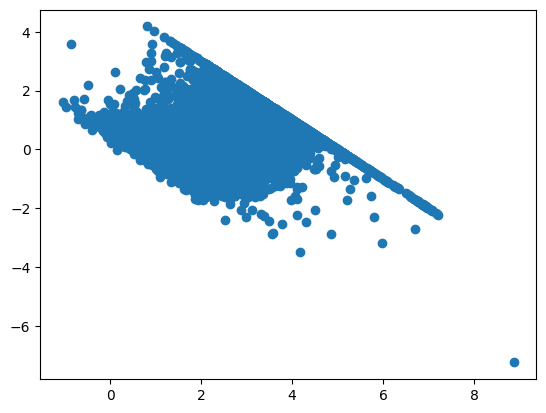

0.7233688180364037 0.6083741964648376


In [ ]:
def metric(game1, game2):
    dist = 0
    if game1['Min_players']!= game1['Min_players']:
      return float('inf')
    else:
